El objetivo es calcular los coeficientes A+ y A- en base a los valores de las distintas frecuencias involucradas y del detuning debido al laser. Defino una función para calcular G y otra que calcula A+ y A- en base a G

$$G(\nu,\omega,\lambda)=\frac{-\chi^2 \alpha^2}{\lambda + i\nu_0} + i\epsilon C $$,

en particular me interesa conocer el valor de G con y sin la corrección.

$$C=\frac{(\lambda+i\nu_0)^2 - \omega^2}{((\lambda+i\nu_0)^2 + \omega^2)^2} $$

Programo una función G y una función G más la corrección. $\chi$ y $\alpha$ se definen como constantes globales. Se trabaja con $\frac{\delta}{\nu_0} = a$ como la variable, haciendo la sustitución se llega a que la corrección es


$$C=\frac{(-k+i\nu_0(a+1))^2 - \omega^2}{((-k+i\nu_0(a+1))^2 + \omega^2)^2} $$

y se toma un rango de $a \in [-2,2]$ para los calculos. Todos los parámetros se definen en terminos de $\nu_0$




In [1]:
#Calcular temperatura

nu0=100000
k =.05*nu0 #kappa es el decaimiento de la cavidad
ep=1/10 #El valor de epsilon


function Aminus(a,epsilon)
    (k/(k^2+(nu0^2)*(a+1)^2))-epsilon*(nu0^2*(a+1)^2*k+k*nu0^2+k^3)/((-nu0^2*(a+1)^2+k^2+nu0^2)^2+4*nu0^2*(a+1)^2*k^2)
end

function Aplus(a,epsilon)
    (k/(k^2+(nu0^2)*(a-1)^2))-epsilon*(nu0^2*(a-1)^2*k+k*nu0^2+k^3)/((-nu0^2*(a-1)^2+k^2+nu0^2)^2+4*nu0^2*(a-1)^2*k^2)
end


n=12
mesh =2^n
y=Vector(undef,2^(n+2)+1)
ye=Vector(undef,2^(n+2)+1)
x=Vector(undef,2^(n+2)+1)
temp=Vector(undef,2^(n+2)+1)
tempe=Vector(undef,2^(n+2)+1)
aminus=Vector(undef,2^(n+2)+1)
aminuse=Vector(undef,2^(n+2)+1)
i=1
plotvariable=zeros(641,2^(n+2)+1)
asdf=[]
scale=1

for a=-2:1/mesh:2
    temp[i]=Aplus(a,0)/(Aminus(a,0)-Aplus(a,0))
    tempe[i]=Aplus(a,ep)/(Aminus(a,ep)-Aplus(a,ep))  
    aminus[i]=Aminus(a,0)
    aminuse[i]=Aminus(a,ep)
    x[i]=a
    i+=1
end




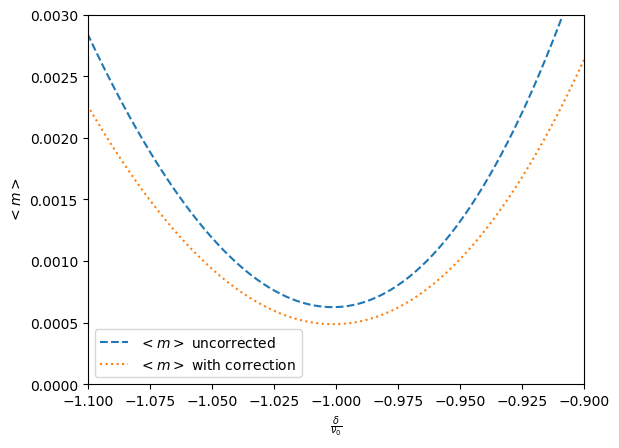

In [17]:
plot(x,temp,linestyle="--",label=L"$<m>$ uncorrected")
plot(x,tempe,linestyle=":",label=L"$<m>$ with correction")
xlim(-1.10,-.9)
ylim(0,0.003)
xlabel(L"\frac{\delta}{\nu_0}")
ylabel(L"<m>")
legend()
savefig("TempGorden1.pdf")

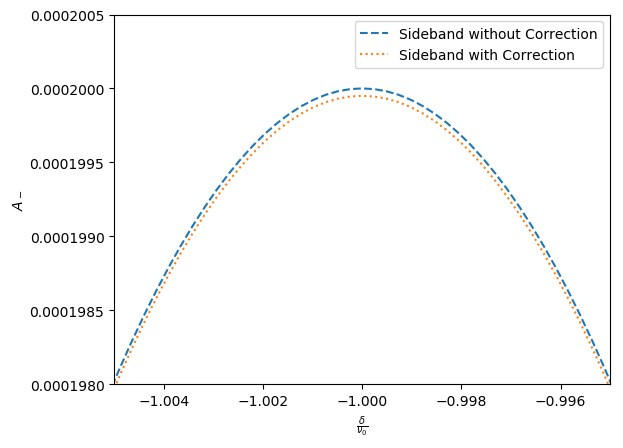

In [18]:
plot(x,aminus,linestyle="--",label="Sideband without Correction")
plot(x,aminuse,linestyle=":",label="Sideband with Correction")
xlim(-1.005,-.995)
xlabel(L"\frac{\delta}{\nu_0}")
ylim(.000198,.0002005)
ylabel(L"A_-")
legend()
savefig("SidebandGOrden1.pdf")

In [2]:
using LaTeXStrings
using PyPlot

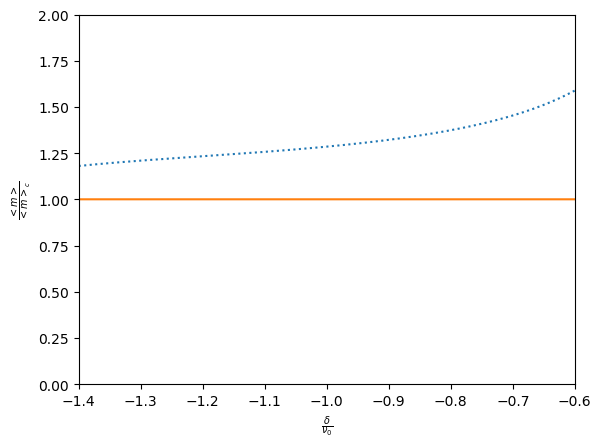

In [24]:
plot(x,temp./tempe,linestyle=":")
plot(x,x.^0)
xlim(-1.4,-.6)
xlabel(L"\frac{\delta}{\nu_0}")
ylim(0,2)
ylabel(L"\frac{<m>}{<m>_c}")
#title("Ratio of uncorrected and corrected final temperatures")
savefig("TempPropGorden1.pdf")

In [115]:
for j=0:1:0
    plot(x,asdf[j+1],label=latexstring("\\epsilon =$(j*scale/10) \\nu_0"))
end

xlim(-1.5,-.75)
ylim(0.05,0.1)
title("Final temperature ")
ylabel("Final Temperature")
xlabel(L"\delta/\nu_0")
legend(loc="upper right")


BoundsError: BoundsError: attempt to access 0-element Array{Any,1} at index [1]

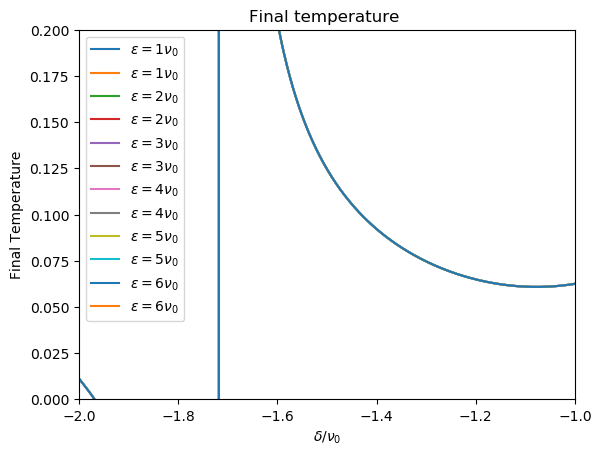

PyObject <matplotlib.legend.Legend object at 0x00000000366C1630>

In [33]:
for j=1:1:6
    plot(x,asdf[j],label=(latexstring("\\epsilon =$j \\nu_0")),ylim(0,.2),xlim(-2,-1.0))
end


title("Final temperature ")
ylabel("Final Temperature")
xlabel(L"\delta/\nu_0")
legend()

# Movimiento de los Mínimos


La siguiente parte consiste en encontrar el mínimo de cada curva. Me interesa encontrar el mínimo, su valor correspondiente de $\frac{\nu_0}{\delta}$ para ese mínimo. 

In [208]:
findall(x -> x < 0,tempe)

1024-element Array{Int64,1}:
 1026
 1027
 1028
 1029
 1030
 1031
 1032
 1033
 1034
 1035
 1036
 1037
 1038
    ⋮
 2038
 2039
 2040
 2041
 2042
 2043
 2044
 2045
 2046
 2047
 2048
 2049

In [34]:
mesh=640
xminloc=513

min_temp_plot=zeros(mesh)
ep_plot=zeros(mesh)
min_pos_plot=zeros(mesh)
epx=zeros(mesh)
min=0.05901715472027972

for i=1:mesh
    min_temp_plot[i]=minimum(asdf[i][1:xminloc])
    min_pos_plot[i]=abs((x[findall(x -> x == min_temp_plot[i],asdf[i][1:xminloc])[1]])-(x[findall(x -> x == min_temp_plot[1],asdf[1][1:xminloc])[1]]))
    epx[i]=scale*i/10
end

min_temp_plot=min_temp_plot/min;

BoundsError: BoundsError: attempt to access 6-element Array{Any,1} at index [7]

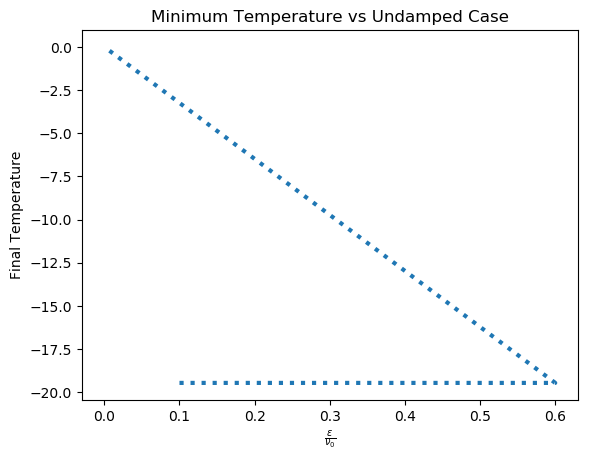

PyObject Text(0.5, 32.020277777777785, '$\\frac{\\epsilon}{\\nu_0}$')

In [35]:
plot(epx,min_temp_plot,linestyle=":",linewidth=3.0)

title("Minimum Temperature vs Undamped Case")
ylabel("Final Temperature")
xlabel(L"\frac{\epsilon}{\nu_0}")


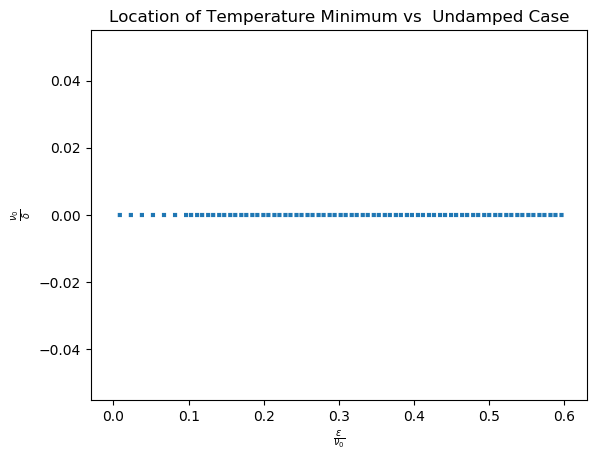

PyObject Text(0.5, 32.020277777777785, '$\\frac{\\epsilon}{\\nu_0}$')

In [36]:
plot(epx,min_pos_plot,linestyle=":",linewidth=3.0)

title("Location of Temperature Minimum vs  Undamped Case")
ylabel(L"\frac{\nu_0}{\delta}")
xlabel(L"\frac{\epsilon}{\nu_0}")

In [8]:
min=minimum(asdf[1][1:xminloc])

0.05901715472027972

In [26]:
2^9

512

In [27]:
plot()

MethodError: MethodError: no method matching ^(::Array{Any,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [34]:
x_example = collect(-2:.1:2);
y1=x_example;
y2=x_example.^2;
y3=x_example.^3;

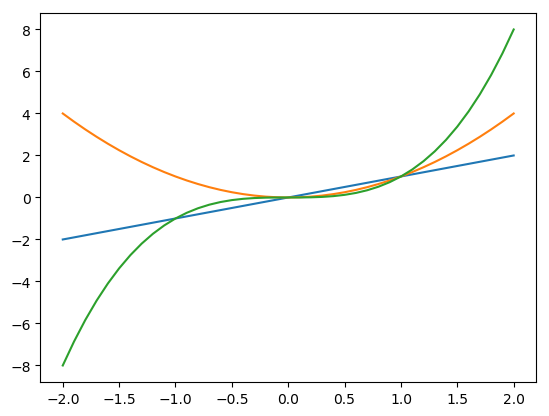

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001806FD30>

In [38]:
plot(x_example,y1)
plot(x_example,y2)
plot(x_example,y3)

In [138]:
aminus-aminuse

4097-element Array{Float64,1}:
 0.0006670830730793254
 0.0006668292635945472
 0.0006660681842915279
 0.0006648033077285961
 0.000663040377610865 
 0.0006607873439284761
 0.0006580542740666321
 0.0006548532417263509
 0.00065119819591377  
 0.0006471048126020022
 0.0006425903319342486
 0.0006376733840149559
 0.0006323738064258784
 ⋮                    
 5.256249474492964e-7 
 5.251610048124783e-7 
 5.246977063295638e-7 
 5.242350507759947e-7 
 5.237730369301624e-7 
 5.233116635734008e-7 
 5.228509294899754e-7 
 5.223908334670789e-7 
 5.21931374294818e-7  
 5.21472550766208e-7  
 5.210143616771627e-7 
 5.205568058264895e-7 